# Classification for Credit Status of Loan Users 

###  By Xiaofan Wang<br>

**<font size=5>Table of Content </font>**<br><br>
　　**<font size=3>1. Introduction </font>**<br><br>
　　**<font size=3>2. Exploratory Data Analysis (EDA) - Feature Selection </font>**<br>
　　　　**<font size=２>2.1. Target Variable</font>**<br>
　　　　**<font size=２>2.2. Explanatory Variables</font>**<br>
　　　　　　·　Drop features missing more than 30% data.<br>
　　　　　　·　Drop features that are unavailable before lending a loan.<br>
　　　　　　·　Drop irrelevant features (based on the explaination of LoanDictionary)<br>
　　　　　　·　Drop highly-correlated features (Pearson Correlation)<br><br>
　　**<font size=3>3. SMOT(Synthetic Minority Oversampling) for imbalance classification </font>**<br><br>
　　**<font size=3>4. Performance Matrice (Functions)</font>**<br>
　　　　**<font size=２>4.1. Confusion Matrix</font>**<br>
　　　　**<font size=２>4.2. Feature Importance</font>**<br>
　　　　**<font size=２>4.3. ROC Curve</font>**<br>
　　　　**<font size=２>4.4. Accuracy, Precision, Recall, F1-Score, ROC Score</font>**<br><br>
　　**<font size=3>5. Machine Learning Algorithms & Evaluation Results</font>**<br>
　　　　**<font size=２>5.1. Logistic Regression with regularization</font>**<br>
　　　　**<font size=２>5.2. Random Forest</font>**<br>
　　　　**<font size=２>5.3. Gradient Boosting Classifer</font>**<br>
　　　　**<font size=２>5.4. Support Vector Machine</font>**<br><br>

## 1. Introduction

· Background: With the development of the Internet, more and more online lending platforms have emerged. The core pattern of online lending platform is to help borrowers and investors cut back on spending, reducing interest payments on borrowers and making returns higher for investors.<br>

· Main Content: This research project takes the credit status of loan users as the target variable, and divides them into two categories “fully paid off” and “charged off” loans. Given that this study is a binary classification problem, machine learning algorithms can be built and applied so as to identify and predict the credit status of loan users more accurately and help online lending platforms reduce loan risk and make more profits.<br>

· Dataset: This research uses loan dataset through 2007 to 2015 from Lending Club, including the loan status and relevant payment information. The original file is a matrix of about 2.26 million observations and 145 variables, which was collected by the Lending Club and a data dictionary is also provided in a separate file, which contains detailed explanation of all variables in the dataset. (https://www.lendingclub.com/loans). <br><br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import itertools
%matplotlib inline
warnings.filterwarnings('ignore')

import sklearn
import imblearn

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFECV
from sklearn import decomposition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
from scipy import stats 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from imblearn.over_sampling import SMOTE

In [2]:
path='Desktop/LoansProject/loan.csv'
data = pd.read_csv(path)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.shape

(2260668, 145)

## 2. Exploratory Data Analysis (EDA) - Feature Selection

### 2.1. Target Variable

In [4]:
data.loan_status.value_counts()

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

In [5]:
data = data[(data['loan_status']=='Fully Paid')|(data['loan_status']=='Charged Off')]
data.loan_status.value_counts()

Fully Paid     1041952
Charged Off     261655
Name: loan_status, dtype: int64

In [6]:
# converting target to binary data 
data.loan_status[(data['loan_status']=='Fully Paid')]=0
data.loan_status[(data['loan_status']=='Charged Off')]=1
# percentage for each class
data.loan_status.astype(float)
data['loan_status'].value_counts(normalize=True, dropna=False)

0    0.799284
1    0.200716
Name: loan_status, dtype: float64

About 80% of the loan users have been fully paid and 20% have charged off, so there exists an imbalanced classification problem. 

### 2.2. Explanatory Variables 

#### 2.2.1. Drop features missing more than 30% data.

In [7]:
# define a function to visualize the features with missing values
def missing_values_table(data):
    # total missing values
    miss_val = data.isnull().sum()
    # percentage of missing values 
    miss_val_perc = 100 * data.isnull().sum()/len(data)
    miss_val_type = data.dtypes
    # set up a table with the results 
    miss_val_table = pd.concat([miss_val, miss_val_perc, miss_val_type], axis=1)
    # rename the cols
    miss_val_table_rename = miss_val_table.rename(columns={0:'Missing Values', 
                                                           1:'Percentage of Missing Values', 
                                                           2:'Type'})
    # descending by percentage of missing values  
    miss_val_table_rename = miss_val_table_rename[
        miss_val_table_rename.iloc[:,1]!=0].sort_values('Percentage of Missing Values', ascending=False).round(1)
    
    # print the summary result
    print("The dataframe has " + str(data.shape[1]) + 
         " columns.\n" "There are " + str(miss_val_table_rename.shape[0]) + " columns that have missing values.")
    
    # return the dataframe 
    return miss_val_table_rename

In [8]:
np.set_printoptions(threshold=np.inf)
missing_values_table(data)

The dataframe has 145 columns.
There are 105 columns that have missing values.


,Missing Values,Percentage of Missing Values,Type
id,1303607,100.0,float64
url,1303607,100.0,float64
member_id,1303607,100.0,float64
next_pymnt_d,1303607,100.0,object
orig_projected_additional_accrued_interest,1300174,99.7,float64
...,...,...,...
chargeoff_within_12_mths,56,0.0,float64
last_credit_pull_d,54,0.0,object
tax_liens,39,0.0,float64
inq_last_6mths,1,0.0,float64


From the above table, it is clear that there exists a huge gap between features missing some data (below 15% and up to 100%). Here, I choose 30% as the cutoff. 

In [9]:
def drop_cols(cols):
    data.drop(labels=cols, axis=1, inplace=True)

In [10]:
miss_frac = data.isnull().mean()
drop_list = sorted(miss_frac[miss_frac>0.30].index)
drop_cols(drop_list)
data.shape

(1303607, 87)

#### 2.2.2. Drop features that are unavailable before lending a loan.

In [11]:
print(sorted(data.columns))

['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'annual_inc', 'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 'disbursement_method', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'funded_amnt', 'funded_amnt_inv', 'grade', 'hardship_flag', 'home_ownership', 'initial_list_status', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt', 'loan_status', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'open

In [12]:
drop_list = ['acc_now_delinq', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 
             'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 
             'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 'disbursement_method', 
             'funded_amnt', 'funded_amnt_inv', 'hardship_flag', 'inq_last_6mths', 
             'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 
             'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq', 
             'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 
             'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 
             'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',  
             'out_prncp', 'out_prncp_inv', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pymnt_plan', 'recoveries', 
             'tax_liens', 'tot_coll_amt', 'tot_cur_bal', 'tot_hi_cred_lim', 'total_bal_ex_mort', 
             'total_bc_limit', 'total_il_high_credit_limit', 'total_pymnt', 'total_pymnt_inv', 
             'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'total_rev_hi_lim']

In [13]:
drop_cols(drop_list)
data.shape

(1303607, 31)

#### 2.2.3. Drop irrelevant features (based on the explaination of LoanDictionary)

In [14]:
print(sorted(data.columns))

['addr_state', 'annual_inc', 'application_type', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'grade', 'home_ownership', 'initial_list_status', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mort_acc', 'open_acc', 'policy_code', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code']


In [15]:
drop_list = ['addr_state', 'application_type', 'earliest_cr_line', 'emp_title', 'grade', 
             'initial_list_status', 'issue_d','mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mort_acc', 
             'policy_code', 'sub_grade', 'title', 'zip_code']
drop_cols(drop_list)
data.shape

(1303607, 17)

Based on the explaination of LoanDictionary from Lending Club, some features are not useful to predict the outcome, therefore, they would be dropped. Here, those relevant features have been explained in details.<br>

#### 2.2.4. Drop highly-correlated features 

##### (1) Data Cleaning: drop the row with missing value

In [16]:
data.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
emp_length              75454
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
purpose                     0
dti                       312
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                810
total_acc                   0
pub_rec_bankruptcies      697
dtype: int64

In [17]:
data.dropna(subset=['emp_length', 'dti', 'revol_util', 'pub_rec_bankruptcies'], axis=0, inplace=True)

In [18]:
data.reset_index(inplace=True)

In [19]:
data = data.drop(columns=['index'])
data.head(3)

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,30000,36 months,22.35,1151.16,5 years,MORTGAGE,100000.0,Source Verified,0,debt_consolidation,30.46,11.0,1.0,15603,37.0,19.0,1.0
1,40000,60 months,16.14,975.71,< 1 year,MORTGAGE,45000.0,Verified,0,credit_card,50.53,18.0,0.0,34971,64.5,37.0,0.0
2,20000,36 months,7.56,622.68,10+ years,MORTGAGE,100000.0,Not Verified,0,credit_card,18.92,9.0,0.0,25416,29.9,19.0,0.0


##### (2) convert the object to numeric

In [20]:
data.dtypes

loan_amnt                 int64
term                     object
int_rate                float64
installment             float64
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
loan_status              object
purpose                  object
dti                     float64
open_acc                float64
pub_rec                 float64
revol_bal                 int64
revol_util              float64
total_acc               float64
pub_rec_bankruptcies    float64
dtype: object

In [21]:
# converting object to numeric
mapping_dict = {
    'emp_length':{
        '10+ years': 10,
        '9 years': 9,
        '8 years': 8,
        '7 years': 7,
        '6 years': 6,
        '5 years': 5,
        '4 years': 4,
        '3 years': 3,
        '2 years': 2,
        '1 year': 1,
        '< 1 year': 0,
    }
}
data.replace(mapping_dict, inplace=True)

##### (3) Data Preprocessing for categorical and numerical data 

In [22]:
# create a list to store categorical and numerical cols
categorical_features=[]
numerical_features=[]

In [23]:
categorical_features.append('term')
categorical_features.append('home_ownership')
categorical_features.append('verification_status')
categorical_features.append('purpose')
numerical_features.append('loan_amnt')
numerical_features.append('int_rate')
numerical_features.append('installment')
numerical_features.append('emp_length')
numerical_features.append('annual_inc')
numerical_features.append('dti')
numerical_features.append('open_acc')
numerical_features.append('pub_rec')
numerical_features.append('revol_bal')
numerical_features.append('revol_util')
numerical_features.append('total_acc')
numerical_features.append('pub_rec_bankruptcies')

In [24]:
# create a dataframe for the categorical data 
data_categorical = pd.DataFrame()
for col in categorical_features:
    data_categorical = pd.concat([data_categorical, data[col]], axis=1)
    
# create a dataframe for the numerical data
data_numerical = pd.DataFrame()
for col in numerical_features:
    data_numerical = pd.concat([data_numerical, data[col]], axis=1)

In [25]:
for col in data_numerical.columns:
    data_numerical[col].astype(float)

In [26]:
for col in data_categorical.columns:
    print(col, '\n', data_categorical[col].unique(), '\n')

term 
 [' 36 months' ' 60 months'] 

home_ownership 
 ['MORTGAGE' 'RENT' 'OWN' 'ANY' 'NONE' 'OTHER'] 

verification_status 
 ['Source Verified' 'Verified' 'Not Verified'] 

purpose 
 ['debt_consolidation' 'credit_card' 'other' 'house' 'car'
 'home_improvement' 'moving' 'small_business' 'medical' 'major_purchase'
 'renewable_energy' 'vacation' 'wedding' 'educational'] 



In [27]:
# create dummy variables (one-hot encoding)
for col in data_categorical.columns:
    dummies = pd.get_dummies(data_categorical[col])
    dummies.drop(dummies.columns[-1], axis=1, inplace=True)  # dropping one of each to reduce multicollinearity
    data_categorical = pd.concat([data_categorical, dummies], axis=1)
    data_categorical.drop(col, axis=1, inplace=True)

for col in data_categorical.columns:
    data_categorical[col] = data_categorical[col].astype(float)

data_categorical.head()

,36 months,ANY,MORTGAGE,NONE,OTHER,OWN,Not Verified,Source Verified,car,credit_card,...,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# scaling numerical data 
scaler = StandardScaler()
scaled_num = pd.DataFrame(scaler.fit_transform(data_numerical), columns = data_numerical.columns)

# combining numerical and categorical data in one dataframe 
data_combine = pd.concat([scaled_num, data_categorical], axis=1)
data_combine.head()

,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation
0,1.764325,1.910576,2.703253,-0.263031,0.312445,1.312590,-0.123336,1.320329,-0.036742,-0.619670,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.910079,0.606514,2.033489,-1.618389,-0.460932,3.446784,1.153946,-0.349650,0.824091,0.504710,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.618571,-1.195233,0.685830,1.092327,0.312445,0.085455,-0.488273,-0.349650,0.399408,-0.909965,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.157348,-0.407756,-1.126254,1.092327,-0.552331,-1.433045,0.059133,-0.349650,-0.531473,-1.506908,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.707639,2.943746,-0.373500,-0.805174,5.233939,-0.611056,1.701352,-0.349650,0.905916,0.553774,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### (4) Pearson Correlation 

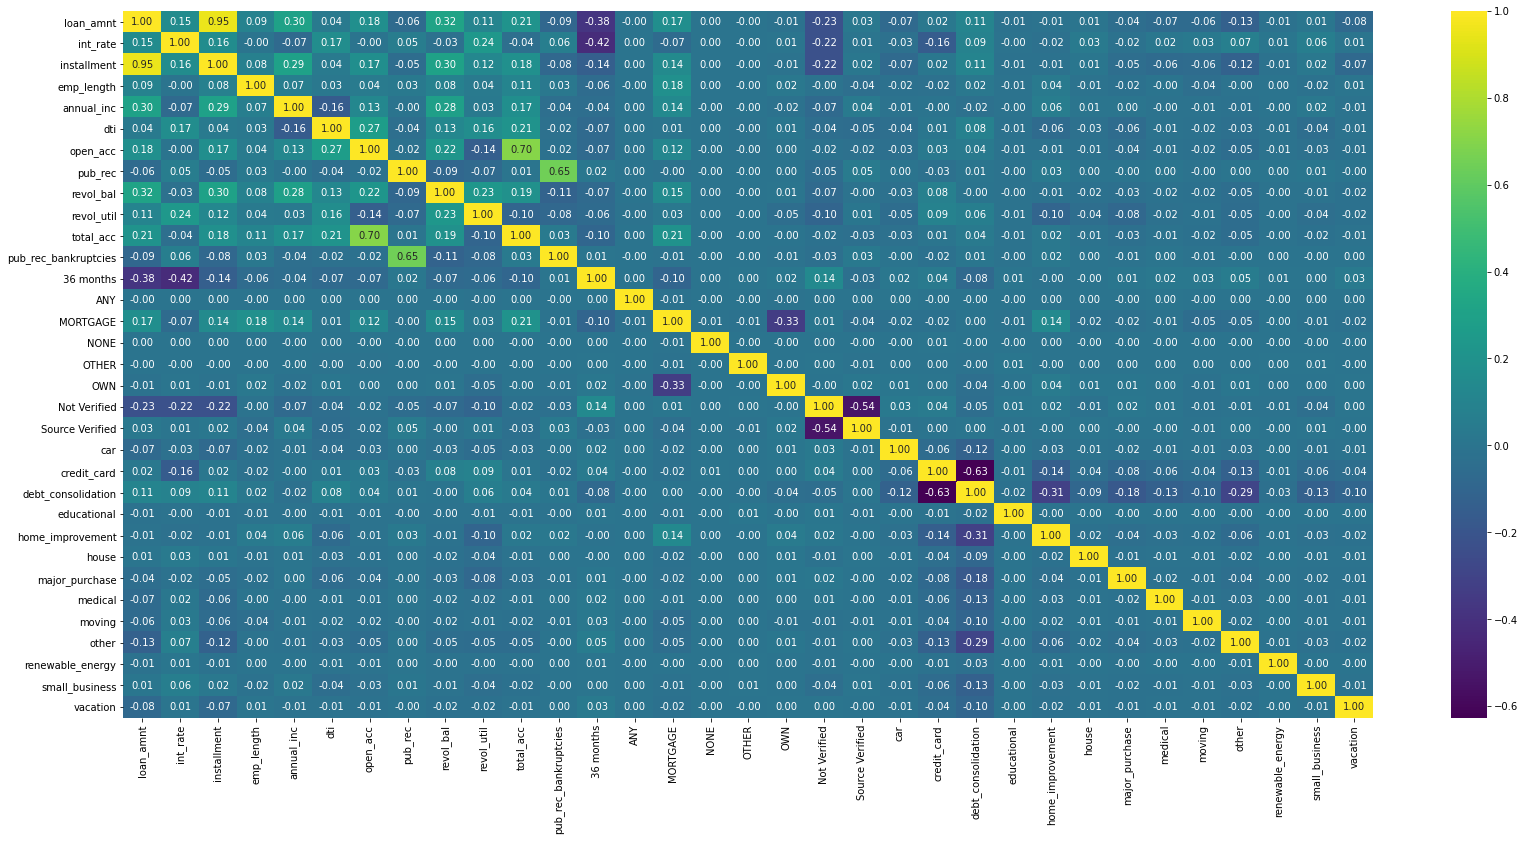

In [29]:
fig, ax = plt.subplots(figsize=(28,13))
cm_data = sns.heatmap(data_combine.corr(),annot=True, fmt=".2f", cmap="viridis", ax=ax)

The highly-correlated features are:<br><br>
· "installment" and "loan_amnt": 0.95<br>
· "total_acc" and "open_acc": 0.70<br>
· "pub_rec_bankruptcies" and "pub_rec": 0.65<br>
· "Source Verified" and "Not Verified": -0.54<br>
· "debt_consolidation" and "credit_card": -0.63<br><br>

In [30]:
list_multicollinearity = ['installment', 'total_acc', 'pub_rec_bankruptcies', 'Not Verified', 'debt_consolidation']

In [31]:
data_combine.drop(list_multicollinearity, axis=1, inplace=True)

<br>

## 3. SMOT(Synthetic Minority Oversampling) for imbalance classification

A problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary.<br>

One way to solve this problem is to oversample the examples in the minority class. This can be achieved by simply duplicating examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model. <br>

An improvement on duplicating examples from the minority class is to synthesize new examples from the minority class. This is a type of data augmentation for tabular data and can be very effective.<br><br>

In [32]:
X = data_combine
y = data.loan_status
print(X.shape, y.shape)
X.head()

(1226680, 28) (1226680,)


,loan_amnt,int_rate,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,36 months,...,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation
0,1.764325,1.910576,-0.263031,0.312445,1.312590,-0.123336,1.320329,-0.036742,-0.619670,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.910079,0.606514,-1.618389,-0.460932,3.446784,1.153946,-0.349650,0.824091,0.504710,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.618571,-1.195233,1.092327,0.312445,0.085455,-0.488273,-0.349650,0.399408,-0.909965,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.157348,-0.407756,1.092327,-0.552331,-1.433045,0.059133,-0.349650,-0.531473,-1.506908,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.707639,2.943746,-0.805174,5.233939,-0.611056,1.701352,-0.349650,0.905916,0.553774,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
y_test = list(y_test)

In [34]:
X_train.head()

,loan_amnt,int_rate,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,36 months,...,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation
309688,0.045694,-1.335929,0.279112,-0.179704,-0.880090,0.971477,-0.349650,-0.505783,-1.412869,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1126678,0.389420,1.305794,0.279112,0.652352,-0.119777,-0.853210,-0.349650,-0.628321,-1.645923,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
510367,-0.257931,-0.474954,-0.805174,-0.320318,-1.272475,-0.670742,1.320329,-0.222483,-0.108588,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
432732,0.045694,-1.258232,1.092327,-0.250011,0.489538,0.606539,-0.349650,-0.052032,-0.390705,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1148507,1.191448,-1.182634,0.821256,0.284322,0.158828,-0.670742,-0.349650,0.531369,0.324810,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
print(y_train.value_counts()) # original class distribution 
y_train_smot = [i for i in y_train]
X_train_resampled, y_train_resampled = SMOTE().fit_sample(X_train, y_train_smot)
print(pd.Series(y_train_resampled).value_counts())  # preview synthetic sample class distribution 
y_train_resampled = list(y_train_resampled)
y_train = list(y_train)

0    690158
1    168518
Name: loan_status, dtype: int64
1    690158
0    690158
dtype: int64


## 4. Performance Matrice (Functions)

### 4.1. Confusion Matrix

In [36]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Oranges):
    # Add Normalization Option
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("\n Confusion Matrix:")
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

### 4.2. Feature Importance

In [37]:
def plot_feature_importance(model, X_train):
    xaxes = list(X_train.columns.values)
    yaxes = list(model.feature_importances_)
    
    h = dict(zip(xaxes, yaxes))
    s = [(k, h[k]) for k in sorted(h, key=h.get, reverse=False)]
    s = dict(s)
    xaxes = list(s.keys())
    yaxes = list(s.values())
    
    n_features = X_train.shape[1]
    plt.figure(figsize=(6,6))
    plt.barh(range(n_features), yaxes, align='center')
    plt.yticks(np.arange(n_features), xaxes)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")

### 4.3. ROC Curve

In [38]:
def roc(logreg, X_train, X_test, y_train, y_test):
    y_test_score = logreg.decision_function(X_test)
    y_train_score = logreg.decision_function(X_train)
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
    print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))
    print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
    
    plt.figure(figsize=(7,4))
    lw = 2
    plt.plot(test_fpr, test_tpr, color='darkorange', lw=lw, label='Test ROC Curve')
    plt.plot(train_fpr, train_tpr, color='blue', lw=lw, label='Train ROC Curve')
    plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC (Receiver Operating Characteristic) Curve')
    plt.legend(loc="lower right")
    plt.show()

### 4.4. Accuracy, Precision, Recall, F1-Score, ROC Score

In [39]:
def performance(y_test, y_pred):
    print("Accuracy of the Model is: {}".format(accuracy_score(y_test, y_pred)))
    print("Precision of the Model is: {}".format(precision_score(y_test, y_pred)))
    print("Recall of the Model is: {}".format(recall_score(y_test, y_pred)))
    print("f1-score of the Model is: {}".format(f1_score(y_test, y_pred)))
    print("roc_auc_score of Model is: {}".format(roc_auc_score(y_test, y_pred)))


<br>

## 5. Machine Learning Algorithms & Evaluation Results

### 5.1. Logistic Regression with regularization

In [40]:
model_lr = LogisticRegression(C=10, fit_intercept=True)
model_lr.fit(X_train_resampled, y_train_resampled)

LogisticRegression(C=10)

In [41]:
y_pred = model_lr.predict(X_test)


 Confusion Matrix:
[[198705  96830]
 [ 27673  44796]]


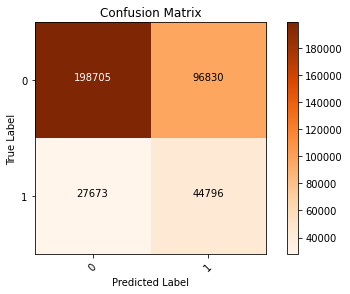

In [42]:
matrix_lr = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(matrix_lr, classes=[0,1])

In [43]:
performance(y_test, y_pred)

Accuracy of the Model is: 0.661680307822741
Precision of the Model is: 0.3162978549136458
Recall of the Model is: 0.6181401702797058
f1-score of the Model is: 0.4184684369088489
roc_auc_score of Model is: 0.6452485411602904


Test AUC: 0.7028933441744675
Train AUC: 0.7067768174254402


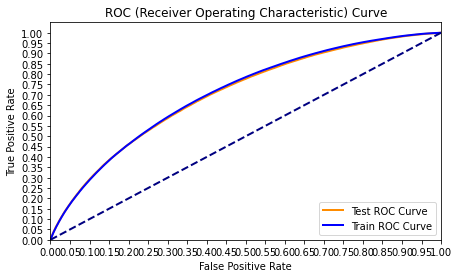

In [44]:
roc(model_lr, X_train_resampled, X_test, y_train_resampled, y_test)

### 5.2. Random Forest

In [45]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train_resampled, y_train_resampled)
y_pred = model_rf.predict(X_test)


 Confusion Matrix:
[[264786  30749]
 [ 52976  19493]]


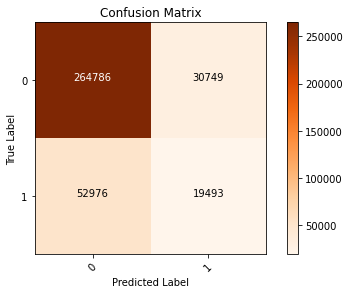

In [46]:
matrix_rf = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(matrix_rf, classes=[0,1])

In [47]:
performance(y_test, y_pred)

Accuracy of the Model is: 0.7724888859903697
Precision of the Model is: 0.38798216631503524
Recall of the Model is: 0.26898397935669044
f1-score of the Model is: 0.31770582914327156
roc_auc_score of Model is: 0.5824693866025674


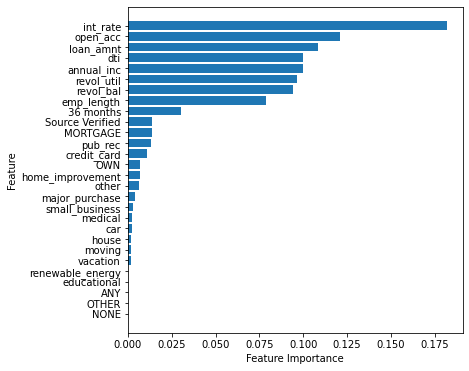

In [48]:
plot_feature_importance(model_rf, X_train_resampled)

### 5.3. Gradient Boosting Classifer

In [49]:
k = len(pd.unique(data.loan_status))
model_gb = GradientBoostingClassifier(n_estimators=100, max_features = k) 
model_gb.fit(X_train_resampled, y_train_resampled) 
y_pred = model_gb.predict(X_test)


 Confusion Matrix:
[[194173 101362]
 [ 27174  45295]]


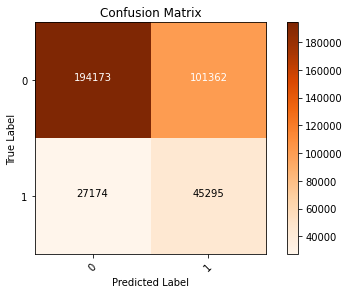

In [50]:
matrix_gb = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(matrix_gb, classes=[0,1])

In [51]:
performance(y_test, y_pred)

Accuracy of the Model is: 0.6507211878131759
Precision of the Model is: 0.30884990147077873
Recall of the Model is: 0.6250258731319599
f1-score of the Model is: 0.41341511276617104
roc_auc_score of Model is: 0.6410239420306457


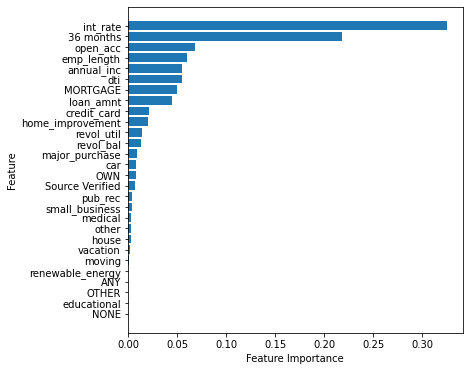

In [52]:
plot_feature_importance(model_gb, X_train_resampled)

### 5.4. Support Vector Machine 

#### 1. Dimension Reduction: PCA 

In [53]:
n_components=28
pca = PCA(n_components)
X_train_pca = pca.fit_transform(X_train_resampled)

In [54]:
X_test_pca = pca.transform(X_test)

Text(0, 0.5, 'Variance Explained')

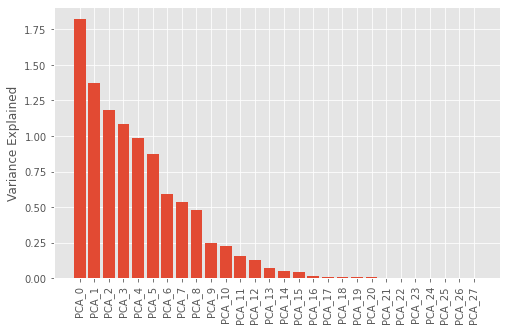

In [55]:
plt.style.use("ggplot")
pca_range = np.arange(n_components) 
pca_names = ("PCA_%s" % i for i in pca_range)
plt.figure(figsize=(8, 5))
plt.bar(pca_range, pca.explained_variance_, align = 'center')
xticks = plt.xticks(pca_range, pca_names, rotation = 90)
plt.ylabel('Variance Explained')

Text(0, 0.5, 'Proportion of Variance Explained')

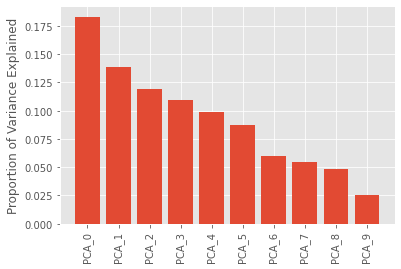

In [56]:
# Take a closer look at top 10 components
pca_range = np.arange(10) 
pca_names = ("PCA_%s" % i for i in pca_range)
plt.figure(figsize=(6,4))
plt.bar(pca_range, pca.explained_variance_ratio_[:10], align = 'center')
xticks = plt.xticks(pca_range, pca_names, rotation = 90)
plt.ylabel('Proportion of Variance Explained')

#### 2. SVM Model (with different kernels)

In [57]:
linear_svm = Pipeline([('pca', PCA(n_components=10)),('clf', svm.SVC(kernel ='linear', max_iter=10))])
linear_svm.fit(X_train_resampled, y_train_resampled)
y_pred = linear_svm.predict(X_test)


 Confusion Matrix:
[[    15 295520]
 [     3  72466]]


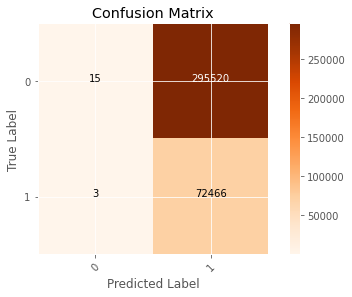

In [58]:
matrix_svm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(matrix_svm, classes=[0,1])

In [59]:
performance(y_test, y_pred)

Accuracy of the Model is: 0.19695709829240987
Precision of the Model is: 0.19692597000972864
Recall of the Model is: 0.9999586029888642
f1-score of the Model is: 0.32905064081461216
roc_auc_score of Model is: 0.5000046791992725


Test AUC: 0.5667682067227554
Train AUC: 0.5670369267244009


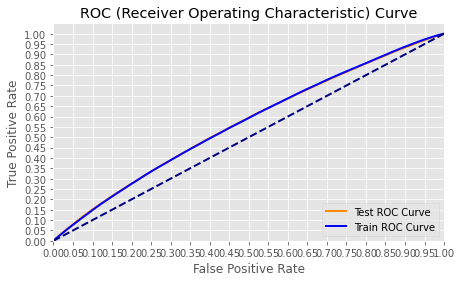

In [60]:
roc(linear_svm, X_train_resampled, X_test, y_train_resampled, y_test)